<a href="https://colab.research.google.com/github/vidhyavasan2002/Letsgrowmore_task1/blob/main/TASK1_Iris_Flower_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Lets Grow More** 
#**Data Science Internship** 
#Author: **VIDHYA LAKSHMI SRINIVASAN**



#**Title: Iris Flowers Classification ML Project**




1. Import Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

1.Importing dataset


In [21]:
iris_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [22]:
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [23]:
iris_data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [24]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [25]:
iris_data.columns = columns
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


2. Understanding The Data

In [26]:
iris_data.shape

(149, 5)

In [27]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [28]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


3. Missing Value's Imputation

In [29]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

4. Data Visualization

Box Plot

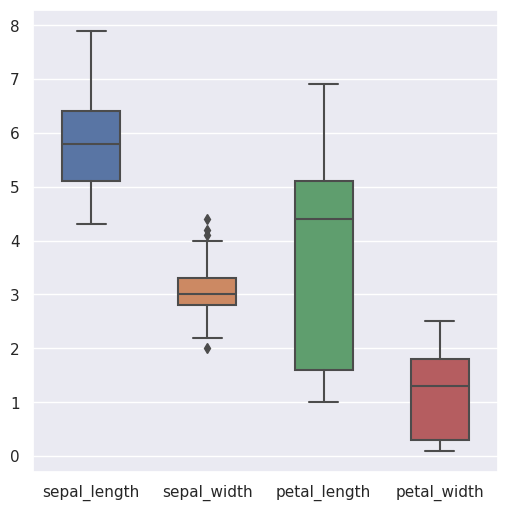

In [30]:
sns.boxplot(data = iris_data, width= 0.5, fliersize = 5)
sns.set(rc = {"figure.figsize" :(6,6)})

Exploring the correlation between different columns


Heatmap

<ipython-input-31-29570db8ae98>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris_data.corr()


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

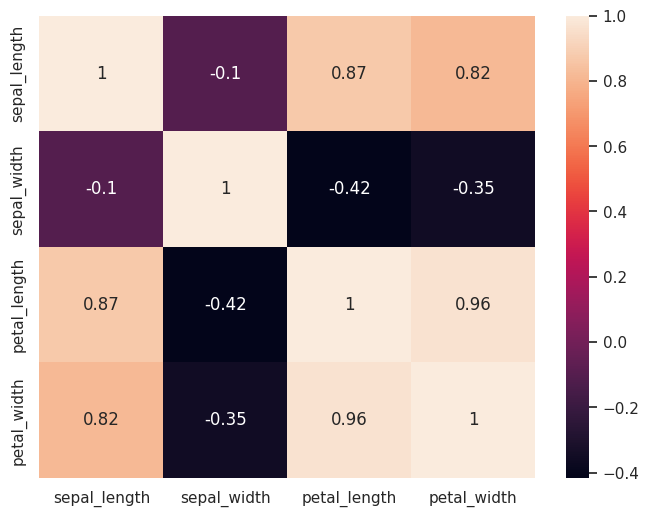

In [31]:
#Plotting a heatmap to determine the correlation between column quantities
corr=iris_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
iris_data.columns

Violin plot


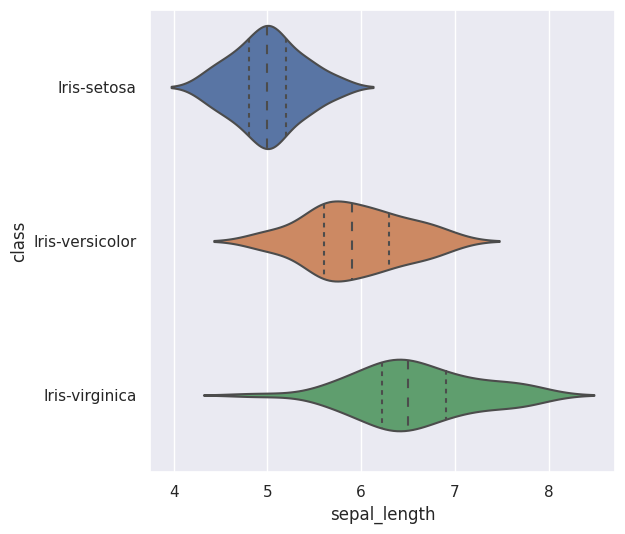

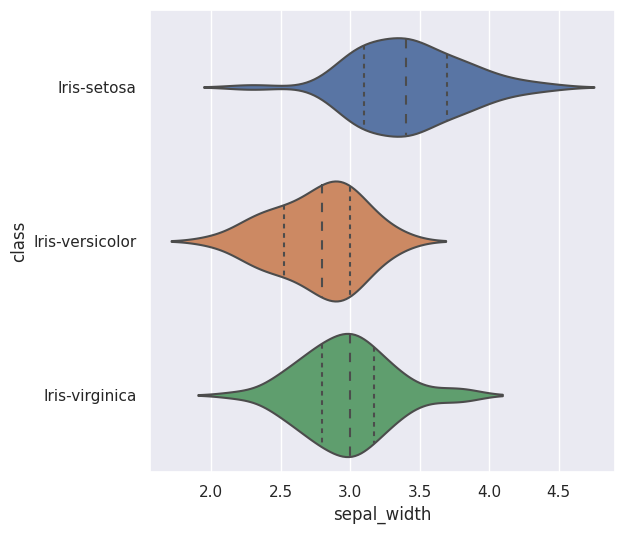

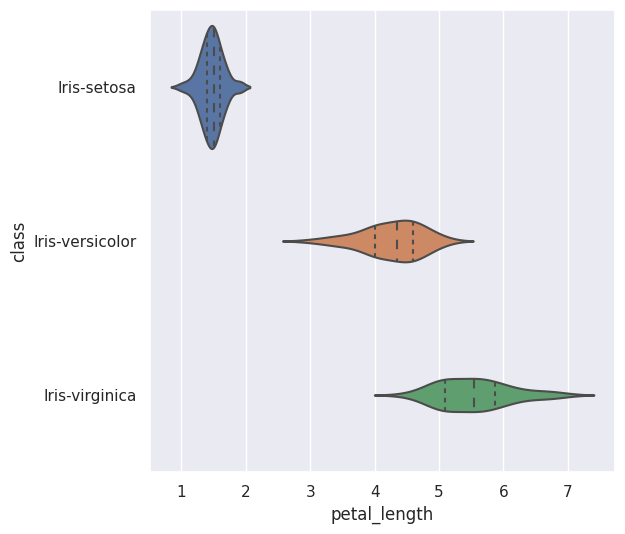

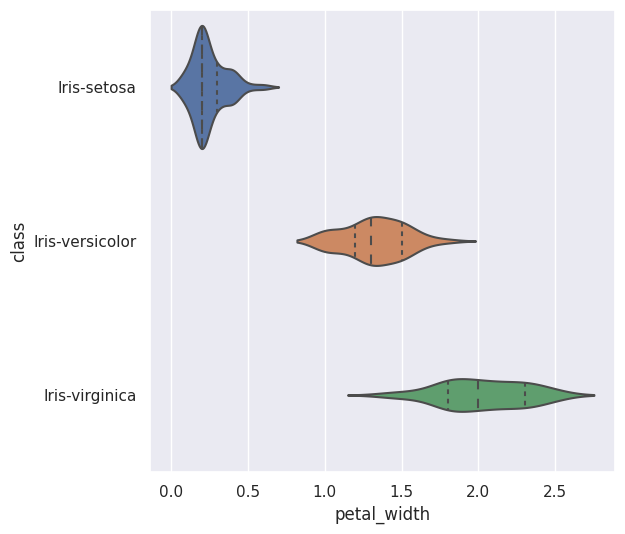

In [32]:
sns.violinplot(y='class', x='sepal_length', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal_width', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_length', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_width', data=iris_data, inner='quartile')
plt.show()

The above-plotted violin plot says that Iris-Setosa class is having a smaller petal length and petal width compared to other class.

5. Model Building - Part-A


5.1.X is having all the dependent variables.

Y is having an independent variable (here in this case ‘class’ is an independent variable).

In [33]:
X = iris_data.drop(['class'], axis=1)
y = iris_data['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (149, 4) | y shape: (149,) 


Here, we can see from the output that the X has 150 rows and 4 columns whereas Y has 150 rows and only one column.

5.2 Train Test split



In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

5.3 Model Creation




In [35]:
model = []
model.append(('SVC', SVC(gamma='auto')))

6. Model Building - Part-B



In [36]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

 Now checking the accuracy of model

In [37]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9333333333333333
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.50      0.67         2

       accuracy                           0.93        15
      macro avg       0.97      0.83      0.87        15
   weighted avg       0.94      0.93      0.92        15



Conclusion

For this model, the accuracy on the test set is 0.93, which means the model made the right prediction for 93% of the irises in the given dataset. We can expect the model to be correct 93% of the time for predicting the species of new irises.
This is a high level of accuracy and it means that our model may be trustworthy enough to use.

##        THANK YOU